<a href="https://colab.research.google.com/github/Seb1824/PROYECTO-FINAL-DE-CARRERA-1-IMPLEMENTACIONES/blob/main/PFC_IMPLEMENTACIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresion lineal

In [2]:
# Instalar dependencias necesarias
!pip install rdkit
!pip install chembl_webresource_client
!pip install xgboost
!pip install torch-geometric
# Estas librerías son estándar pero aseguramos su presencia
!pip install pandas numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00


In [ ]:
from torch_geometric.datasets import QM9
dataset = QM9(root="data/QM9")
print("QM9 cargado correctamente ✓")

Extracting data/QM9/raw/qm9.zip
Processing...
100%|██████████| 133885/133885 [03:12<00:00, 696.41it/s] 
Done!


QM9 cargado correctamente ✓


In [ ]:
mol = dataset[0]
print("mol.y shape:", mol.y.shape)
print("target:", mol.y)
print("available attributes:", mol)


mol.y shape: torch.Size([1, 19])
target: tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]])
available attributes: Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], smiles='[H]C([H])([H])[H]', name='gdb_1', idx=[1])


In [ ]:
TARGET_INDEX = 14  # G298

rows = []
for mol in dataset:
    smiles = mol.smiles
    target = mol.y[0, TARGET_INDEX].item()
    rows.append({"smiles": smiles, "property": target})

df = pd.DataFrame(rows)
print(df.head())


              smiles   property
0  [H]C([H])([H])[H] -17.389656
1       [H]N([H])[H] -12.159273
2            [H]O[H]  -9.330214
3          [H]C#C[H] -16.869347
4             [H]C#N -13.186666


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

def calcular_descriptores(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return [
            Descriptors.MolWt(mol),          # Peso molecular
            Descriptors.MolLogP(mol),        # LogP
            Descriptors.NumHDonors(mol),     # Donadores H
            Descriptors.NumHAcceptors(mol),  # Aceptores H
            Descriptors.TPSA(mol),           # Superficie polar
        ]
    else:
        return [np.nan]*5

df["features"] = df["smiles"].apply(calcular_descriptores)
df = df.dropna(subset=["features"])

df.head()


,smiles,property,features
0,[H]C([H])([H])[H],-17.389656,"[16.043, 0.6361, 0, 0, 0.0]"
1,[H]N([H])[H],-12.159273,"[17.031, 0.16199999999999998, 1, 1, 35.0]"
2,[H]O[H],-9.330214,"[18.015, -0.8247, 0, 0, 31.5]"
3,[H]C#C[H],-16.869347,"[26.037999999999997, 0.24939999999999998, 0, 0..."
4,[H]C#N,-13.186666,"[27.025999999999996, 0.13978, 0, 1, 23.79]"


In [ ]:
import pandas as pd

X = pd.DataFrame(df["features"].tolist(),
                 columns=["MolWt","LogP","HDonors","HAcceptors","TPSA"])
y = df["property"]

print(X.shape, y.shape)


(130831, 5) (130831,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)

print("Datos listos ✔")


Datos listos ✔


Cargando QM9…


Extracting data/QM9/raw/qm9.zip
Processing...
100%|██████████| 133885/133885 [03:07<00:00, 715.56it/s]
Done!


QM9 cargado ✓
Extrayendo SMILES y propiedades…


100%|██████████| 130831/130831 [00:29<00:00, 4364.29it/s]


              smiles   property
0  [H]C([H])([H])[H] -17.389656
1       [H]N([H])[H] -12.159273
2            [H]O[H]  -9.330214
3          [H]C#C[H] -16.869347
4             [H]C#N -13.186666
Calculando descriptores moleculares…
Tamaño final después de limpieza: (129012, 5)
Entrenando modelo de Regresión Lineal…

📊 RESULTADOS REGRESIÓN LINEAL (g298):
MAE      = 3.4868
RMSE     = 4.9351
MSE      = 24.3553
MedAE    = 2.7201
R²       = 0.7780
Pearson  = 0.8821
Spearman = 0.8829


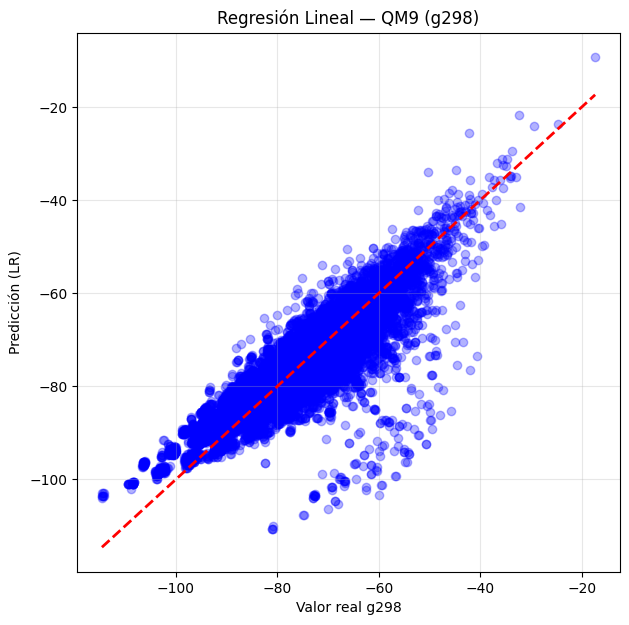

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import median_absolute_error
import matplotlib.pyplot as plt


# CARGAR QM9
from torch_geometric.datasets import QM9

print("Cargando QM9…")
dataset = QM9(root="data/QM9")
print("QM9 cargado ✓")

# Elegimos PROPERTY INDEX = 14 (g298_atom)
TARGET_INDEX = 14


# EXTRAER DATAFRAME (SMILES + PROPERTY)
rows = []
print("Extrayendo SMILES y propiedades…")
for mol in tqdm(dataset):
    smiles = mol.smiles
    target = mol.y[0, TARGET_INDEX].item()  # y tiene shape [1, 19]
    rows.append({"smiles": smiles, "property": target})

df = pd.DataFrame(rows)
print(df.head())



# CALCULAR DESCRIPTORES RDKit
def calcular_descriptores(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return [
            Descriptors.MolWt(mol),
            Descriptors.MolLogP(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.TPSA(mol),
        ]
    else:
        return [np.nan] * 5


print("Calculando descriptores moleculares…")
df["features"] = df["smiles"].apply(calcular_descriptores)



# CREAR MATRIZ X E Y Y LIMPIAR NAN
X = pd.DataFrame(
    df["features"].to_list(),
    columns=["MolWt", "LogP", "HDonors", "HAcceptors", "TPSA"]
)

y = df["property"]

# limpiar todo
full = pd.concat([X, y], axis=1).dropna().reset_index(drop=True)

X = full[["MolWt", "LogP", "HDonors", "HAcceptors", "TPSA"]]
y = full["property"]

print("Tamaño final después de limpieza:", X.shape)



# TRAIN / TEST SPLIT Y NORMALIZACIÓN
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)


# ENTRENAR REGRESIÓN LINEAL
print("Entrenando modelo de Regresión Lineal…")
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_norm, y_train)

y_pred = modelo_lr.predict(X_test_norm)

# MÉTRICAS
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
pearson, _ = pearsonr(y_test, y_pred)
spearman, _ = spearmanr(y_test, y_pred)

print("\n📊 RESULTADOS REGRESIÓN LINEAL (g298):")
print(f"MAE      = {mae:.4f}")
print(f"RMSE     = {rmse:.4f}")
print(f"MSE      = {mse:.4f}")
print(f"MedAE    = {medae:.4f}")
print(f"R²       = {r2:.4f}")
print(f"Pearson  = {pearson:.4f}")
print(f"Spearman = {spearman:.4f}")



# GRÁFICA REAL vs PREDICHO
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Valor real g298")
plt.ylabel("Predicción (LR)")
plt.title("Regresión Lineal — QM9 (g298)")
plt.grid(True, alpha=0.3)
plt.show()


SVM

In [4]:
from torch_geometric.datasets import QM9
import torch
import pandas as pd
from tqdm import tqdm

# Cargar QM9
dataset = QM9(root="data/QM9")
print("QM9 cargado ✔")

# Tomaremos g298 → índice 14
TARGET_INDEX = 14

rows = []
for mol in tqdm(dataset):
    smiles = mol.smiles
    # mol.y tiene shape (1,19)
    value = mol.y[0, TARGET_INDEX].item()
    rows.append({"smiles": smiles, "property": value})

df = pd.DataFrame(rows)
print(df.head())
print("Filas totales:", len(df))


QM9 cargado ✔


100%|██████████| 130831/130831 [00:31<00:00, 4160.43it/s]


              smiles   property
0  [H]C([H])([H])[H] -17.389656
1       [H]N([H])[H] -12.159273
2            [H]O[H]  -9.330214
3          [H]C#C[H] -16.869347
4             [H]C#N -13.186666
Filas totales: 130831


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def calcular_descriptores(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return [
            Descriptors.MolWt(mol),
            Descriptors.MolLogP(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.TPSA(mol),
        ]
    return [np.nan] * 5

df["features"] = df["smiles"].apply(calcular_descriptores)

# Eliminar NaN
df_clean = df.dropna(subset=["features"]).copy()

# Matriz X y vector y
X = pd.DataFrame(df_clean["features"].to_list(),
                 columns=["MolWt", "LogP", "HDonors", "HAcceptors", "TPSA"])
y = df_clean["property"]

# División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("X_train_norm listo ✔")


[12:13:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[12:13:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[12:13:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[12:13:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[12:13:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:13:36] Explicit valence for atom # 3 C, 5, is g

X_train_norm listo ✔


[12:14:27] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:14:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[12:14:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[12:14:27] Explicit valence for atom # 5 C, 5, is greater than permitted


In [ ]:
# Convertir listas de features en matriz X
X = pd.DataFrame(
    df_clean["features"].to_list(),
    columns=["MolWt", "LogP", "HDonors", "HAcceptors", "TPSA"]
)

y = df_clean["property"].reset_index(drop=True)

# Concatenamos para limpiar NaNs completamente
full = pd.concat([X, y], axis=1)

# Eliminar cualquier fila que tenga NaN en cualquier columna
full_clean = full.dropna().reset_index(drop=True)

print("Filas originales:", len(full))
print("Filas después de limpieza total:", len(full_clean))

# Separar X e y
X = full_clean[["MolWt", "LogP", "HDonors", "HAcceptors", "TPSA"]]
y = full_clean["property"]


Filas originales: 130831
Filas después de limpieza total: 129012


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


Reduciendo dataset para SVM (para evitar horas de entrenamiento)...
Entrenando SVM con 10000 muestras de entrenamiento…

RESULTADOS SVM — QM9 (g298)
MAE      = 2.4289
RMSE     = 4.0519
MSE      = 16.4182
MedAE    = 1.4024
R²       = 0.8504
Pearson  = 0.9226
Spearman = 0.9212


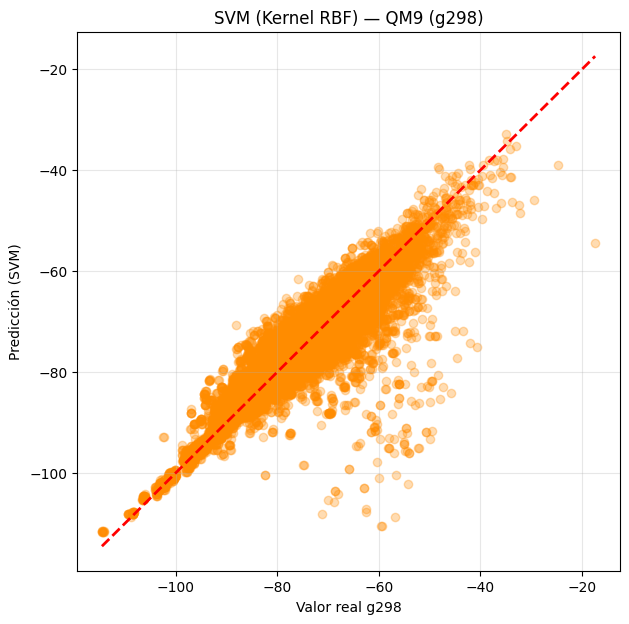

In [5]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import median_absolute_error

import matplotlib.pyplot as plt
import numpy as np

print("Reduciendo dataset para SVM (para evitar horas de entrenamiento)...")

N = 10000  # reducir tamaño
X_train_svm = X_train_norm[:N]
y_train_svm = y_train[:N]

print(f"Entrenando SVM con {N} muestras de entrenamiento…")

modelo_svm = SVR(kernel="rbf", C=10, gamma="scale")
modelo_svm.fit(X_train_svm, y_train_svm)

y_pred_svm = modelo_svm.predict(X_test_norm)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
medae_svm = median_absolute_error(y_test, y_pred_svm)
pearson_svm, _ = pearsonr(y_test, y_pred_svm)
spearman_svm, _ = spearmanr(y_test, y_pred_svm)


print("\nRESULTADOS SVM — QM9 (g298)")
print(f"MAE      = {mae_svm:.4f}")
print(f"RMSE     = {rmse_svm:.4f}")
print(f"MSE      = {mse_svm:.4f}")
print(f"MedAE    = {medae_svm:.4f}")
print(f"R²       = {r2_svm:.4f}")
print(f"Pearson  = {pearson_svm:.4f}")
print(f"Spearman = {spearman_svm:.4f}")


plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_svm, alpha=0.3, color="darkorange")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)
plt.xlabel("Valor real g298")
plt.ylabel("Predicción (SVM)")
plt.title("SVM (Kernel RBF) — QM9 (g298)")
plt.grid(alpha=0.3)
plt.show()


RANDOM FOREST


Entrenando Random Forest...
✓ Entrenamiento completado

RESULTADOS RANDOM FOREST
MAE      = 0.4568
RMSE     = 0.9666
MSE      = 0.9343
MedAE    = 0.2830
R²       = 0.9915
Pearson  = 0.9957
Spearman = 0.9970


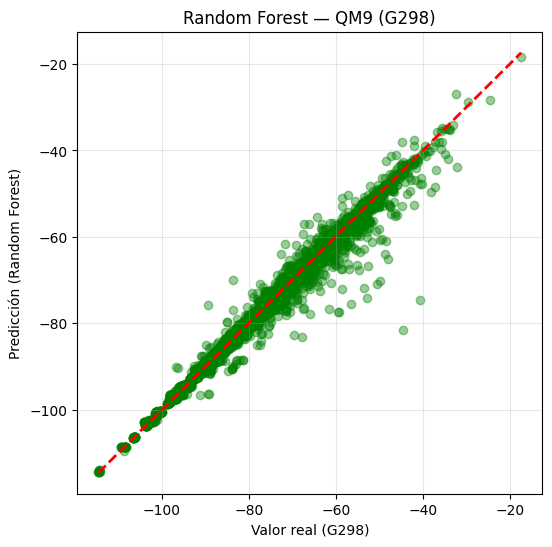

<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import median_absolute_error

import numpy as np
import matplotlib.pyplot as plt

print("Entrenando Random Forest...")

# Modelo recomendado para datasets químicos
modelo_rf = RandomForestRegressor(
    n_estimators=300,   # número de árboles (300 es bueno para regresión química)
    max_depth=None,    # profundidad automática
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1          # usa todos los núcleos disponibles
)

modelo_rf.fit(X_train, y_train)

print("✓ Entrenamiento completado")

# Predicción
y_pred_rf = modelo_rf.predict(X_test)

# Métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
medae_rf = median_absolute_error(y_test, y_pred_rf)
pearson_rf, _ = pearsonr(y_test, y_pred_rf)
spearman_rf, _ = spearmanr(y_test, y_pred_rf)


print("\nRESULTADOS RANDOM FOREST")
print(f"MAE      = {mae_rf:.4f}")
print(f"RMSE     = {rmse_rf:.4f}")
print(f"MSE      = {mse_rf:.4f}")
print(f"MedAE    = {medae_rf:.4f}")
print(f"R²       = {r2_rf:.4f}")
print(f"Pearson  = {pearson_rf:.4f}")
print(f"Spearman = {spearman_rf:.4f}")


# Gráfico
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Valor real (G298)")
plt.ylabel("Predicción (Random Forest)")
plt.title("Random Forest — QM9 (G298)")
plt.grid(alpha=0.3)
plt.show()

plt.savefig("rf_qm9.png", dpi=300, bbox_inches='tight')


GIN (Graph Isomorphism Network)

In [7]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GINConv, global_add_pool
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import QM9
import numpy as np

#   CARGAR QM9
print("Cargando QM9...")
dataset = QM9(root="data/QM9")

TARGET_INDEX = 14  # g298

#   FORZAR QUE TODAS LAS ETIQUETAS SEAN SOLO g298
y_full = dataset.data.y[:, TARGET_INDEX].view(-1, 1).float()
dataset.data.y = y_full

idx = 0
for mol in dataset:
    mol.y = y_full[idx:idx+1]  # shape [1,1]
    idx += 1

print("QM9 cargado correctamente y y corregido ✓")

#   DIVIDIR TRAIN / VAL / TEST
torch.manual_seed(42)

train_dataset = dataset[:100000]
val_dataset   = dataset[100000:120000]
test_dataset  = dataset[120000:]

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=128)
test_loader  = DataLoader(test_dataset, batch_size=128)

print("Datasets listos ✓")

#   DEFINIR MODELO GIN
class GIN(torch.nn.Module):
    def __init__(self, hidden_dim=128):
        super().__init__()

        def mlp():
            return torch.nn.Sequential(
                torch.nn.Linear(hidden_dim, hidden_dim),
                torch.nn.ReLU(),
                torch.nn.Linear(hidden_dim, hidden_dim)
            )

        self.embedding = torch.nn.Embedding(100, hidden_dim)

        self.conv1 = GINConv(mlp())
        self.conv2 = GINConv(mlp())
        self.conv3 = GINConv(mlp())

        self.pool = global_add_pool

        self.fc = torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, 1)
        )

    def forward(self, data):
        x, edge_index, batch = data.z, data.edge_index, data.batch

        x = self.embedding(x)
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)

        x = self.pool(x, batch)
        out = self.fc(x)
        return out.squeeze()

#   ENTRENAMIENTO
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

model = GIN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

print("Modelo GIN listo ✓")

def train_epoch():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)

        optimizer.zero_grad()
        pred = model(batch)
        loss = loss_fn(pred, batch.y.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * batch.num_graphs

    return total_loss / len(train_loader.dataset)

def evaluate(loader):
    model.eval()
    total_mae = 0
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            pred = model(batch)
            mae = (pred - batch.y.view(-1)).abs().sum()
            total_mae += mae.item()
    return total_mae / len(loader.dataset)


#   ENTRENAR MODELO
for epoch in range(1, 11):
    loss = train_epoch()
    val_mae = evaluate(val_loader)
    print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | Val MAE: {val_mae:.4f}")

#   GUARDAR MODELO
torch.save(model.state_dict(), "gin_qm9_g298.pth")
print("Modelo GIN entrenado y guardado ✓")





Cargando QM9...


/tmp/ipython-input-1831805755.py:15: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  y_full = dataset.data.y[:, TARGET_INDEX].view(-1, 1).float()
/tmp/ipython-input-1831805755.py:16: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  dataset.data.y = y_full


QM9 cargado correctamente y y corregido ✓
Datasets listos ✓
Usando dispositivo: cpu
Modelo GIN listo ✓
Epoch 01 | Loss: 35.9378 | Val MAE: 0.7522
Epoch 02 | Loss: 0.9707 | Val MAE: 0.9914
Epoch 03 | Loss: 0.7101 | Val MAE: 0.6999
Epoch 04 | Loss: 0.6003 | Val MAE: 0.4188
Epoch 05 | Loss: 0.9292 | Val MAE: 0.4676
Epoch 06 | Loss: 0.4382 | Val MAE: 0.3333
Epoch 07 | Loss: 0.4107 | Val MAE: 0.6967
Epoch 08 | Loss: 0.4055 | Val MAE: 0.9247
Epoch 09 | Loss: 0.3755 | Val MAE: 0.5091
Epoch 10 | Loss: 0.3500 | Val MAE: 0.3360
Modelo GIN entrenado y guardado ✓



MÉTRICAS GIN — QM9 (g298)
MAE      = 0.4245
RMSE     = 0.5332
MSE      = 0.2843
MedAE    = 0.3613
R²       = 0.9974
Pearson  = 0.9989
Spearman = 0.9985


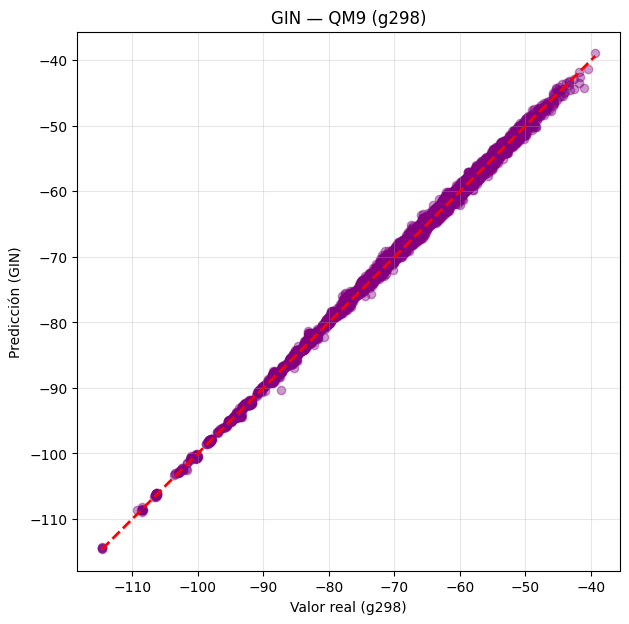

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from scipy.stats import pearsonr, spearmanr
import numpy as np

# OBTENER PREDICCIONES
model.eval()
y_real = []
y_pred = []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        pred = model(batch)

        y_pred.extend(pred.cpu().tolist())
        y_real.extend(batch.y.cpu().tolist())

y_real = np.array(y_real).flatten()
y_pred = np.array(y_pred).flatten()

# MÉTRICAS COMPLETAS GIN
mae = np.mean(np.abs(y_real - y_pred))
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
mse = mean_squared_error(y_real, y_pred)
medae = median_absolute_error(y_real, y_pred)
r2 = r2_score(y_real, y_pred)
pearson, _ = pearsonr(y_real, y_pred)
spearman, _ = spearmanr(y_real, y_pred)

print("\nMÉTRICAS GIN — QM9 (g298)")
print(f"MAE      = {mae:.4f}")
print(f"RMSE     = {rmse:.4f}")
print(f"MSE      = {mse:.4f}")
print(f"MedAE    = {medae:.4f}")
print(f"R²       = {r2:.4f}")
print(f"Pearson  = {pearson:.4f}")
print(f"Spearman = {spearman:.4f}")


# GRÁFICO
plt.figure(figsize=(7,7))
plt.scatter(y_real, y_pred, alpha=0.4, color="purple")

plt.plot(
    [y_real.min(), y_real.max()],
    [y_real.min(), y_real.max()],
    "r--", lw=2
)

plt.xlabel("Valor real (g298)")
plt.ylabel("Predicción (GIN)")
plt.title("GIN — QM9 (g298)")
plt.grid(alpha=0.3)
plt.axis("equal")
plt.show()
